In [1]:
from sklearn import datasets
from sklearn import model_selection

In [2]:
from sklearn.decomposition import PCA

In [3]:
#!pip3 install https://download.pytorch.org/whl/cpu/torch-1.1.0-cp36-cp36m-win_amd64.whl

In [4]:
from sklearn import linear_model #to use SGD classifier

In [5]:
data=datasets.load_iris()

In [6]:
dataArr=data.data

In [7]:
type(dataArr)

numpy.ndarray

In [8]:
type(data)

sklearn.utils.Bunch

In [9]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

split data

In [11]:
trainData,testData,labelTrain,labelTest=model_selection.train_test_split(dataArr,data.target)

In [12]:
trainData.shape,testData.shape, dataArr.shape

((112, 4), (38, 4), (150, 4))

reduce the dimensions of data from 4D to 3D using PCA

In [13]:
pca=PCA(n_components=3)

In [14]:
dataReduced=pca.fit_transform(dataArr)

In [15]:
type(dataReduced)

numpy.ndarray

plot the data after its dimensions are reduced

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

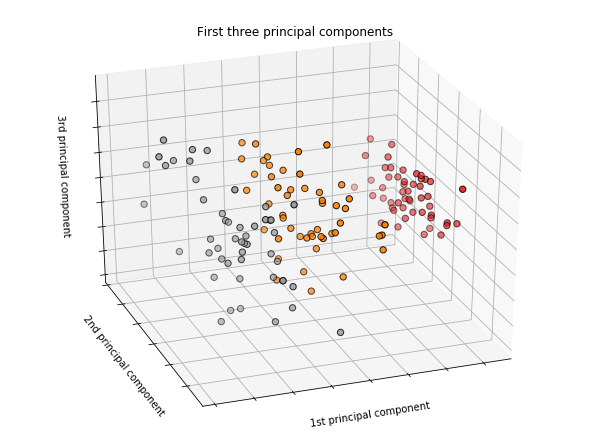

In [17]:
fig= plt.figure(1,figsize=(8,6))
axes=Axes3D(fig, elev=-150, azim=110)
axes.scatter(dataReduced[:, 0], dataReduced[:, 1], dataReduced[:, 2], c=data.target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
axes.set_title("First three principal components")
axes.set_xlabel('1st principal component')
axes.set_ylabel('2nd principal component')
axes.set_zlabel('3rd principal component')
axes.set_xticklabels([])
axes.set_yticklabels([])
axes.set_zticklabels([])

plt.show()

models on reduced dimension data

In [18]:
trainDataRed,testDataRed=model_selection.train_test_split(dataReduced)

Apply a Linear classifier on the original data

SGDClassifier calculates the gradient of the loss by iterating through each sample of the dataset and is updated with the learning rate.

In [19]:
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(trainData,labelTrain)
clf.score(testData,labelTest)

0.9736842105263158

Apply a Linear classifier on the reduced data

In [20]:
clfPCA = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clfPCA.fit(trainDataRed,labelTrain)
clfPCA.score(testDataRed,labelTest)

0.3684210526315789

knn on orginal data

In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(trainData,labelTrain)
clf2.score(testData,labelTest)

1.0

knn on reduced data

In [22]:
clf2PCA = KNeighborsClassifier(n_neighbors=3)
clf2PCA.fit(trainDataRed,labelTrain)
clf2PCA.score(testDataRed,labelTest)

0.39473684210526316